In [1]:
!pip install tensorflow==2.16.2 matplotlib==3.9.1
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
# Load the VGG16 model pre-trained on ImageNet
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


### Create and Compile the model

In [3]:
# Create a new model and add the base model and new layers
model = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dense(1, activation='sigmoid')  # Change to the number of classes you have
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

### Create Placeholder images

In [4]:
import os
from PIL import Image
import numpy as np

# Create directories if they don't exist
os.makedirs('sample_data/class_a', exist_ok=True)
os.makedirs('sample_data/class_b', exist_ok=True)

# Create 10 sample images for each class
for i in range(10):
    # Create a blank white image for class_a
    img = Image.fromarray(np.ones((224, 224, 3), dtype=np.uint8) * 255)
    img.save(f'sample_data/class_a/img_{i}.jpg')

    # Create a blank black image for class_b
    img = Image.fromarray(np.zeros((224, 224, 3), dtype=np.uint8))
    img.save(f'sample_data/class_b/img_{i}.jpg')

print("Sample images created in 'sample_data/'")

Sample images created in 'sample_data/'


### Train the model


In [5]:
# Load and preprocess the dataset
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    'sample_data',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

# Verify if the generator has loaded images correctly
print(f"Found {train_generator.samples} images belonging to {train_generator.num_classes} classes.")

# Train the model
if train_generator.samples > 0:
    model.fit(train_generator, epochs=10)

Found 20 images belonging to 2 classes.
Found 20 images belonging to 2 classes.
Epoch 1/10


/Users/ajborbz/Projects/DataScience_AI_ML/TensorFlow/venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.5000 - loss: 0.6849
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.5000 - loss: 5.5021
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.5000 - loss: 1.9173
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.5000 - loss: 0.8071
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.5000 - loss: 0.9847
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.5000 - loss: 0.9914
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.5000 - loss: 0.9452
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.5000 - loss: 0.8722
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.5000 - loss: 0.7882
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.5000 - loss: 0.7078


### Fine tune the model

In [6]:
# Unfreeze the top layers of the base model 

for layer in base_model.layers[-4:]:
    layer.trainable = True 

# Compile the model again 
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']) 

# Train the model again 
model.fit(train_generator, epochs=10) 

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.5000 - loss: 0.6426
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.5000 - loss: 3.7006
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.5000 - loss: 5.1270
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.5000 - loss: 0.6984
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.5000 - loss: 0.9634
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.5000 - loss: 0.6904
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.5000 - loss: 0.6846
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.5000 - loss: 0.6509
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 1.0000 - loss: 0.6255
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.5000 - loss: 0.5676


### Visualize training and validation loss

Found 16 images belonging to 2 classes.
Found 4 images belonging to 2 classes.
Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 1.0000 - loss: 0.4513 - val_accuracy: 1.0000 - val_loss: 0.3099
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 1.0000 - loss: 0.3099 - val_accuracy: 0.5000 - val_loss: 1.0328
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.5000 - loss: 1.0328 - val_accuracy: 0.5000 - val_loss: 2.8663
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.5000 - loss: 2.8663 - val_accuracy: 0.5000 - val_loss: 1.6834
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.5000 - loss: 1.6834 - val_accuracy: 1.0000 - val_loss: 0.2351
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 1.0000 - loss: 0.2351 - val_accuracy: 0.5000 - val_loss: 0.7831
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.5000 - loss: 0.7831 - val_accuracy: 0.5000 - val_loss: 0.7943
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0

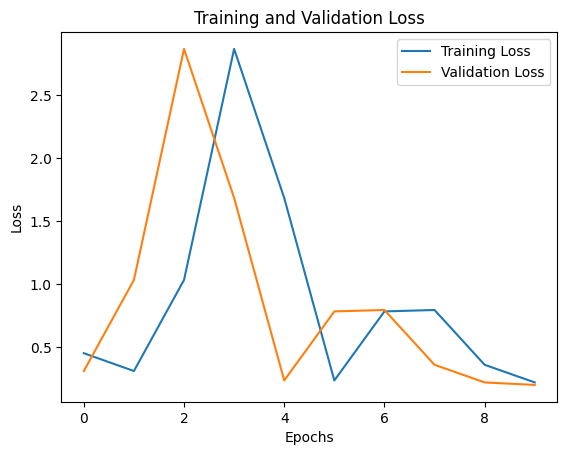

In [7]:
# Modify data generator to include validation data
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    'sample_data',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    'sample_data',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

# Train the model with validation data
history = model.fit(train_generator, epochs=10, validation_data=validation_generator)

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Use different Optimizers

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 1.0000 - loss: 0.1997 - val_accuracy: 1.0000 - val_loss: 0.2946
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 1.0000 - loss: 0.2946 - val_accuracy: 0.5000 - val_loss: 1.0910
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.5000 - loss: 1.0910 - val_accuracy: 0.5000 - val_loss: 0.6698
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.5000 - loss: 0.6698 - val_accuracy: 1.0000 - val_loss: 0.3016
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 1.0000 - loss: 0.3016 - val_accuracy: 1.0000 - val_loss: 0.1743
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 1.0000 - loss: 0.1743 - val_accuracy: 1.0000 - val_loss: 0.1073
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 1.0000 - loss: 0.1073 - val_accuracy: 1.0000 - val_loss: 0.0685
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 1.0000 - loss: 0.0685 - val_accuracy: 1.0000 - val_loss: 0.0481
Epoch 9/10
1/1 ━

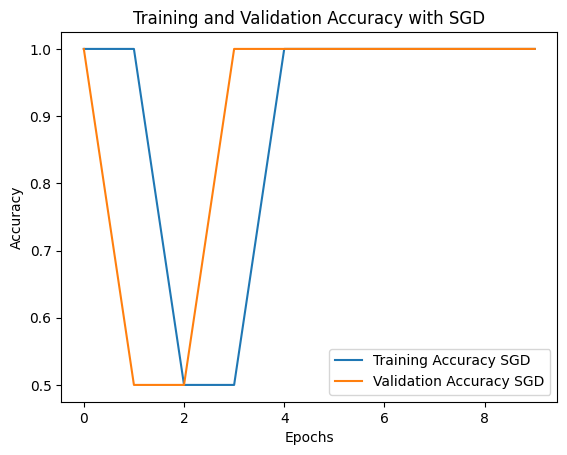

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 1.0000 - loss: 0.1997 - val_accuracy: 0.5000 - val_loss: 79.6334
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.5000 - loss: 79.6334 - val_accuracy: 0.5000 - val_loss: 1.8292
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.5000 - loss: 1.8292 - val_accuracy: 0.5000 - val_loss: 0.7294
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.5000 - loss: 0.7294 - val_accuracy: 0.5000 - val_loss: 1.9844
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.5000 - loss: 1.9844 - val_accuracy: 0.5000 - val_loss: 0.4743
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.5000 - loss: 0.4743 - val_accuracy: 1.0000 - val_loss: 0.1676
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 1.0000 - loss: 0.1676 - val_accuracy: 1.0000 - val_loss: 0.0574
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 1.0000 - loss: 0.0574 - val_accuracy: 1.0000 - val_loss: 0.0234
Epoch 9/10
1/1

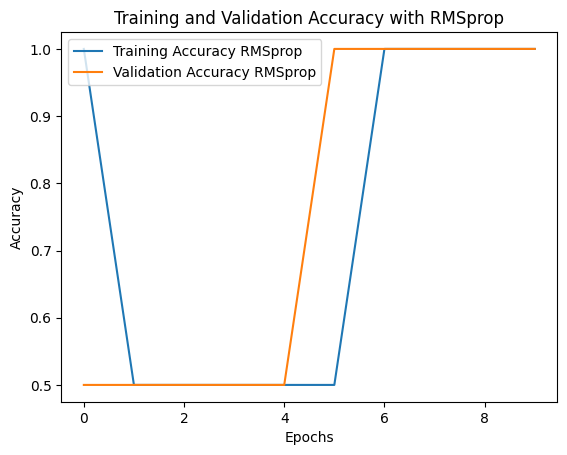

In [8]:
from tensorflow.keras.models import clone_model
import matplotlib.pyplot as plt

# Function to reset the model weights
def reset_model(model):
    # Clone the model to reset weights
    model_clone = clone_model(model)
    model_clone.set_weights(model.get_weights())
    return model_clone

# Prepare to reset the model for each optimizer test
initial_model = reset_model(model)  # Assume 'model' is the initial compiled model

# Experiment with SGD optimizer
sgd_model = reset_model(initial_model)  # Reset model
sgd_model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])
history_sgd = sgd_model.fit(train_generator, epochs=10, validation_data=validation_generator)

# Plot training and validation accuracy for SGD
plt.plot(history_sgd.history['accuracy'], label='Training Accuracy SGD')
plt.plot(history_sgd.history['val_accuracy'], label='Validation Accuracy SGD')
plt.title('Training and Validation Accuracy with SGD')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Experiment with RMSprop optimizer
rmsprop_model = reset_model(initial_model)  # Reset model
rmsprop_model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
history_rmsprop = rmsprop_model.fit(train_generator, epochs=10, validation_data=validation_generator)

# Plot training and validation accuracy for RMSprop
plt.plot(history_rmsprop.history['accuracy'], label='Training Accuracy RMSprop')
plt.plot(history_rmsprop.history['val_accuracy'], label='Validation Accuracy RMSprop')
plt.title('Training and Validation Accuracy with RMSprop')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Evaluate model on a test set

In [9]:
# Load and preprocess the test dataset
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    'sample_data',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

# Evaluate the fine-tuned model on the test set
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Test Loss: {test_loss:.4f}')

Found 20 images belonging to 2 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 1.0000 - loss: 0.1997
Test Accuracy: 100.00%
Test Loss: 0.1997
